For the source of these numbers, check 'Heatmap' folder.

Guide for jupyter notebook namings in the folder:

"brain": sub-cluster values (first 4 column) with p value threshold 0.05

"brain-4-clusters": core cluster values (last column) with p value threshold 0.05

"brain-q": same, but with q value threshold 0.05

"brain-4-clusters-q": same, but with q value threshold 0.05

In [1]:
import numpy as np
from numpy import inf
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
import pandas as pd
from math import log10

In [12]:
# Cramer's V Calculation

def expected_m(a):
    e = np.zeros(a.shape)
    for i in range(e.shape[0]):
        for j in range(e.shape[1]):
            e[i][j] = (np.sum(a, axis=1)[i])*(np.sum(a, axis=0)[j])/(np.sum(a))
    return e

def chisq (a, e):
    return (np.sum(np.square(a-e)/e))

def cramersv (a, a_chi):
    r = a.shape[0]
    k = a.shape[1]
    n = np.sum(a)
    num = a_chi/n
    denom = np.minimum(r-1, k-1)
    return(np.sqrt(num/denom))

def cramer (a):
    e = expected_m(a)
    chi = chisq(a, e)
    cra = cramersv(a, chi)
    return cra

For brain tissue, there is an 'original' version ('orig'), and a reordered version where the large numbers are in the diagonal.
For kidney and lung, there is no reordering

In [2]:
# contingency matrix as originally exported
brain_orig = np.array([[13, 88, 5, 1, 107], 
                       [7, 17, 0, 188, 212], 
                       [138, 3, 185, 0, 326], 
                       [25, 50, 14, 11, 100]])

# avg brain node strength 
brain_deg_orig = np.array([[1.82, 15, 17.79, 12.07, 13.5],
                           [5.85, 22.87, 0, 23, 22.4],
                           [6.56, 11.3, 22.12, 0, 15.4],
                           [6.71, 23.15, 21.68, 27.04, 19.3]])

# number of genes enriched in each cell (p-value cutoff 0.05)
# enrichment values pertaining to the original contingency matrix
brain_enrich_orig = np.array([[8, 4, 0, 0, 39],
                              [0, 14, 0, 170, 190], 
                              [41, 0, 159, 0, 262], 
                              [0, 22, 3, 3, 40]])

# number of enriched go tags (p-value cutoff 0.05)
brain_go_orig = np.array([[41, 2, 0, 0, 28],
                          [0, 25, 0, 119, 147], 
                          [7, 0, 133, 0, 80], 
                          [0, 9, 4, 3, 10]])

# geometric mean of p-values of enriched GO terms
brain_p_orig = np.array([[8.54e-05, 0.00040293, 0, 0, 0.0001763], 
                         [0, 2.851e-05, 0, 6.02e-06, 2.93e-06], 
                         [1.042e-05, 0, 1.05e-06, 0, 6.5e-07], 
                         [0, 4.461e-05, 0.00075451, 0.000202, 0.00025006]])

# mean of q values (without threshold)
brain_q_orig = np.array([[0.05484073, 1.0, 0, 0, 0.12716786], 
                         [0, 0.07654632, 0, 0.01056775, 0.00931782], 
                         [0.16781714, 0, 0.00800083, 0, 0.01314259], 
                         [0, 0.27832889, 1.0, 0.715, 0.4147]])
# (without threshold)
brain_qmax_orig = np.array([[0.149, 1.0, 0, 0, 0.243], 
                            [0, 0.247, 0, 0.0595, 0.0462], 
                            [0.918, 0, 0.0481, 0, 0.0708], 
                            [0, 0.749, 1.0, 1.0, 0.604]])

# (without threshold)
brain_qmed_orig = np.array([[0.0407, 1.0, 0, 0, 0.133], 
                            [0, 0.00608, 0, 0.00275, 0.00113], 
                            [0.00977, 0, 0.000664, 0, 0.00095], 
                            [0, 0.344, 1.0, 0.687, 0.4635]])

# (without threshold)
brain_qmin_orig = np.array([[0.00637, 1.0, 0, 0, 0.0144], 
                            [0, 0.000298, 0, 1e-08, 0.0], 
                            [0.00148, 0, 0.0, 0, 0.0], 
                            [0, 0.00162, 1.0, 0.458, 0.114]])

# (without threshold)
brain_p_e_orig = np.array([[5, 4, 0, 0, 4], 
                      [0, 5, 0, 6, 6], 
                      [5, 0, 6, 0, 7], 
                      [0, 5, 4, 4, 4]])

# mean q values with 0.05 threshold
brain_enrich_qt_orig = np.array([[8, 0, 0, 0, 11], 
                                 [0, 12, 0, 170, 190], 
                                 [36, 0, 159, 0, 250], 
                                 [0, 6, 0, 0, 0]])

# enriched GO terms with q < 0.05 threshold 
brain_go_qt_orig = np.array([[24, 0, 0, 0, 3], 
                             [0, 13, 0, 111, 147], 
                             [5, 0, 133, 0, 69], 
                             [0, 3, 0, 0, 0]])

# median q values with 0.05 threshold
brain_qmed_logqt_orig = np.array([[1.74958, 0, 0, 0, 1.63078414], 
                                  [0, 2.42945706, np.nan, 2.61261017, 2.94692156], 
                                  [2.1123827, 0, 3.17783192, np.nan, 3.4621809], 
                                  [0, 2.48945499, 0, 0, 0]])



# -----



# sidenote: no reordeing will be done on kidney / lung contingency tables
# number of genes in the intersections
kidney = np.array([[10, 93, 74, 177], 
                   [10, 53, 34, 97], 
                   [4, 11, 64, 79], 
                   [2, 19, 90, 111], 
                   [93, 163, 0, 256]])


lung = np.array([[2, 8,  65, 75], 
                 [14, 93, 68, 175], 
                 [65, 141, 0, 206], 
                 [10, 66, 39, 115], 
                 [2, 21, 90, 113]])



# kidney avg node degrees
kidney_deg = np.array([[2.69, 3.79, 14.82, 8.34],
                       [1.3, 3.92, 10.9, 6.09],
                       [2.29, 1.58, 13.77, 11.49],
                       [1, 3.47, 18.03, 15.23],
                       [1.82, 1.14, 0, 0.39]])

# number of genes enriched in each cell
kidney_enrich = np.array([[0, 31, 64, 118], 
                          [0, 50, 0, 23],
                          [0, 8, 56, 68],
                          [0, 4, 80, 96],
                          [33, 10, 0, 177]])

# number of GO terms enriched in each cell
kidney_go = np.array([[0, 3, 58, 45], 
                      [0, 2, 0, 5],
                      [0, 1, 30, 28],
                      [0, 7, 94, 83],
                      [5, 23, 0, 38]])


# -------------
# number of genes enriched in each cell
lung_enrich = np.array([[0, 0, 56, 60], 
                        [2, 58, 43, 137],
                        [15, 106, 0, 143],
                        [0, 0, 31, 75],
                        [0, 4, 75, 93]])

# number of GO terms enriched in each cell
lung_go = np.array([[0, 0, 42, 35], 
                    [1, 5, 51, 58],
                    [4, 39, 0, 33],
                    [0, 0, 9, 2],
                    [0, 2, 51, 59]])


# -------------

# geometric mean of p-values of enriched GO terms
kidney_p = np.array([[0, 0.00015514, 0.00016511, 0.00011682], 
                     [0, 0.00044315, 0, 0.00016331], 
                     [0, 0.000187, 0.00032827, 0.00020087],
                     [0, 0.00024049, 1.367e-05, 2.243e-05],
                     [5.864e-05, 4.86e-05 , 0, 7.7e-07]])

# ---

kidney_q = np.array([[0, 0.62833333, 0.06523069, 0.06296378], 
                     [0, 1.0, 0, 0.5314], 
                     [0, 1.0, 0.19315333, 0.1538375],
                     [0, 0.50257143, 0.01301275, 0.0228558],
                     [0.595858, 0.11215696, 0, 0.03108366]])

kidney_qmax = np.array([[0, 0.918, 0.113, 0.138], 
                        [0, 1.0, 0, 1.0], 
                        [0, 1.0, 0.251, 0.231],
                        [0, 0.723, 0.0724, 0.0795],
                        [1.0, 0.285, 0, 0.125]])

kidney_qmed = np.array([[0, 0.643, 0.08145, 0.0682], 
                        [0, 1.0, 0, 0.475], 
                        [0, 1.0, 0.2095, 0.163],
                        [0, 0.532, 0.00681, 0.0124],
                        [0.954, 0.116, 0, 0.003295]])

kidney_qmin = np.array([[0, 0.324, 0.00239, 0.00371], 
                        [0, 1.0, 0, 0.121], 
                        [0, 1.0, 0.0841, 0.0036],
                        [0, 0.279, 3.83e-06, 3.4e-07],
                        [0.00269, 0.000375, 0, 0.0]])


# q value threshold at 0.05
# number of genes enriched in each cell
kidney_enrich_qt = np.array([[0, 0, 49, 109], 
                             [0, 0, 0, 0], 
                             [0, 0, 0, 57],
                             [0, 0, 80, 95],
                             [16, 50, 0, 160]])

# number of GO terms enriched in each cell
kidney_go_qt = np.array([[0, 0, 23, 21], 
                         [0, 0, 0, 0], 
                         [0, 0, 0, 3],
                         [0, 0, 85, 70],
                         [2, 8, 0, 29]])


# ---

lung_p = np.array([[0, 0, 9.61e-05, 6.298e-05], 
                   [0.000395, 0.00034727, 0.0002251, 5.077e-05], 
                   [0.00049876, 2.462e-05, 0, 4.46e-06],
                   [0, 0, 0.00035373, 0.00067657],
                   [0, 0.000798, 2.601e-05, 3.845e-05]])



kidney_p_e = np.array([[0, 4, 4, 4], 
                       [0, 4, 0, 4], 
                       [0, 4, 4, 4], 
                       [0, 4, 5, 5], 
                       [5, 5, 0, 7]])

lung_p_e = np.array([[0, 0, 5, 5], 
                     [4, 4, 4, 5], 
                     [4, 5, 0, 6], 
                     [0, 0, 4, 4], 
                     [0, 4, 5, 5]])


# ---

lung_q = np.array([[0, 0, 0.08588407, 0.07021486], 
                   [1.0, 0.8534, 0.0953498, 0.03726084], 
                   [1.0, 0.06068061, 0, 0.02738908],
                   [0, 0, 0.58366667, 1.0],
                   [0, 1.0, 0.0270358, 0.02859621]])

lung_qmax = np.array([[0, 0, 0.183, 0.162], 
                      [1.0, 1.0, 0.17, 0.111], 
                      [1.0, 0.164, 0, 0.134],
                      [0, 0, 0.713, 1.0],
                      [0, 1.0, 0.123, 0.0878]])

lung_qmed = np.array([[0, 0, 0.0947, 0.0788], 
                      [1.0, 1.0, 0.113, 0.02845], 
                      [1.0, 0.0543, 0, 0.0055],
                      [0, 0, 0.629, 1.0],
                      [0, 1.0, 0.0113, 0.013]])

lung_qmin = np.array([[0, 0, 0.000407, 0.00132], 
                      [1.0, 0.326, 0.00407, 0.000413], 
                      [1.0, 1.37e-06, 0, 3.41e-06],
                      [0, 0, 0.203, 1.0],
                      [0, 1.0, 2.93e-06, 1.51e-06]])


lung_enrich_qt = np.array([[0, 0, 50, 55], 
                           [0, 0, 39, 129], 
                           [0, 77, 0, 137],
                           [0, 0, 0, 0],
                           [0, 0, 70, 88]])

lung_go_qt = np.array([[0, 0, 14, 17], 
                       [0, 0, 17, 33], 
                       [0, 19, 0, 26],
                       [0, 0, 0, 0],
                       [0, 0, 41, 43]])




In [8]:
# reordering columns ("diagonalizing" brain table)

permutation = [3, 0, 2, 1, 4]
idx = np.empty_like(permutation)
idx[permutation] = np.arange(len(permutation))

brain = brain_orig[:, idx]
brain_deg = brain_deg_orig[:, idx]
brain_enrich = brain_enrich_orig[:, idx]
brain_go = brain_go_orig[:, idx]

brain_p = brain_p_orig[:, idx]
brain_p_e = brain_p_e_orig[:, idx]
brain_q = brain_q_orig[:, idx]
brain_qmax = brain_qmax_orig[:, idx]
brain_qmed = brain_qmed_orig[:, idx]
brain_qmin = brain_qmin_orig[:, idx]


brain_enrich_qt = brain_enrich_qt_orig[:, idx]
brain_go_qt = brain_go_qt_orig[:, idx]
brain_qmed_logqt = brain_qmed_logqt_orig[:, idx]



FIGURE 2

In [9]:
# FIGURE 2 TABLES

print(brain)
print(brain_deg)

print(kidney)
print(kidney_deg)




[[ 88   1   5  13 107]
 [ 17 188   0   7 212]
 [  3   0 185 138 326]
 [ 50  11  14  25 100]]
[[15.   12.07 17.79  1.82 13.5 ]
 [22.87 23.    0.    5.85 22.4 ]
 [11.3   0.   22.12  6.56 15.4 ]
 [23.15 27.04 21.68  6.71 19.3 ]]
[[ 10  93  74 177]
 [ 10  53  34  97]
 [  4  11  64  79]
 [  2  19  90 111]
 [ 93 163   0 256]]
[[ 2.69  3.79 14.82  8.34]
 [ 1.3   3.92 10.9   6.09]
 [ 2.29  1.58 13.77 11.49]
 [ 1.    3.47 18.03 15.23]
 [ 1.82  1.14  0.    0.39]]


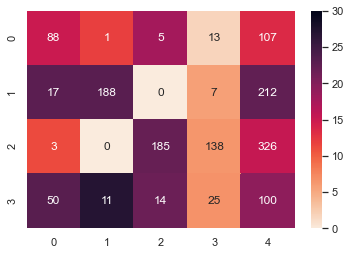

In [16]:
# Last column contains core clusters which is not included in article version

ax = sns.heatmap(brain_deg, cmap="rocket_r", vmin=0, vmax=30, annot=brain, fmt='g')

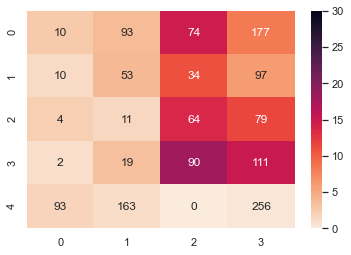

In [17]:
# Last column contains core clusters which is not included in article version

ax = sns.heatmap(kidney_deg, cmap="rocket_r", vmin=0, vmax=30, annot=kidney, fmt='g')

FIGURE 3

In [5]:
# FIGURE 3/A

print(sum(brain_enrich_orig[:, -1]))
print(sum(kidney_enrich[:, -1]))
print(sum(lung_enrich[:, -1]))

print(sum(brain_go_orig[:, -1]))
print(sum(kidney_go[:, -1]))
print(sum(lung_go[:, -1]))

531
482
508
265
199
187


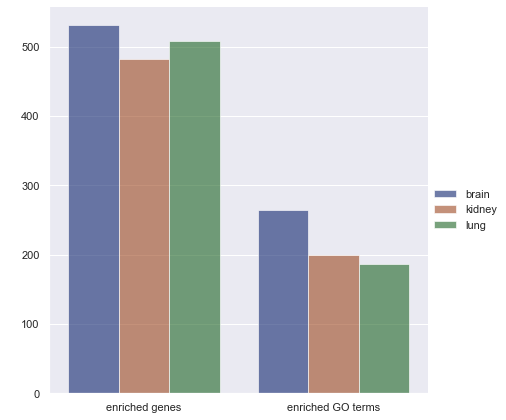

In [15]:
values = [531, 482, 508, 265, 199, 187]
labels = ["enriched genes", "enriched genes", "enriched genes", 
          "enriched GO terms", "enriched GO terms", "enriched GO terms"]
tissues = ["brain", "kidney", "lung", "brain", "kidney", "lung"]

df = pd.DataFrame({'values': values, 'labels': labels, 'tissues': tissues})

g = sns.catplot(
    data=df, kind="bar",
    x="labels", y="values", hue="tissues",
    ci="std", palette="dark", alpha=.6, height=6
)

g.set_axis_labels("", " ")
g.legend.set_title("")

In [13]:
# FIGURE 3/B


print(brain_go[:, :-1])
print(kidney_go[:, :-1])
print(lung_go[:, :-1])

print(cramer(brain_go[:, :-1]))
print(cramer(kidney_go[:, :-1]))
print(cramer(lung_go[:, :-1]))



[[  2   0   0  41]
 [ 25 119   0   0]
 [  0   0 133   7]
 [  9   3   4   0]]
[[ 0  3 58]
 [ 0  2  0]
 [ 0  1 30]
 [ 0  7 94]
 [ 5 23  0]]
[[ 0  0 42]
 [ 1  5 51]
 [ 4 39  0]
 [ 0  0  9]
 [ 0  2 51]]
0.7801158999932302
0.6002555017096894
0.6365512470865269


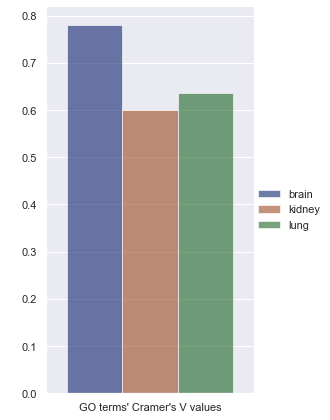

In [14]:
values = [0.780, 0.600, 0.637]
tissues = ["brain", "kidney", "lung"]
df_cramer = pd.DataFrame({'values': values, 'tissues': tissues, 'labels': "GO terms' Cramer's V values"})

g = sns.catplot(
    data=df_cramer, kind="bar",
    x="labels", y="values", hue="tissues",
    ci="std", palette="dark", alpha=.6, height=6, aspect=.6
)

g.set_axis_labels("", " ")
g.legend.set_title("")

In [25]:
brain_ratio_q = brain_enrich_qt / brain
brain_ratio_q[np.isnan(brain_ratio_q)] = 0
print(brain_ratio_q)

[[0.         0.         0.         0.61538462 0.10280374]
 [0.70588235 0.90425532 0.         0.         0.89622642]
 [0.         0.         0.85945946 0.26086957 0.76687117]
 [0.12       0.         0.         0.         0.        ]]


<ipython-input-25-facb143e3280>:1: RuntimeWarning: invalid value encountered in true_divide
  brain_ratio_q = brain_enrich_qt / brain


In [22]:
# FIGURE 4/A

# Numbers
print(brain)

# Coloring
print(brain_ratio_q)


# FIGURE 4/B

# Numbers
print(brain_go_qt)

# Coloring
print(brain_qmed_logqt)

[[ 88   1   5  13 107]
 [ 17 188   0   7 212]
 [  3   0 185 138 326]
 [ 50  11  14  25 100]]
[[0.         0.         0.         0.61538462 0.10280374]
 [0.70588235 0.90425532 0.         0.         0.89622642]
 [0.         0.         0.85945946 0.26086957 0.76687117]
 [0.12       0.         0.         0.         0.        ]]
[[  0   0   0  24   3]
 [ 13 111   0   0 147]
 [  0   0 133   5  69]
 [  3   0   0   0   0]]
[[0.         0.         0.         1.74958    1.63078414]
 [2.42945706 2.61261017        nan 0.         2.94692156]
 [0.                nan 3.17783192 2.1123827  3.4621809 ]
 [2.48945499 0.         0.         0.         0.        ]]


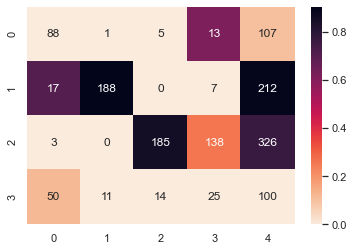

In [23]:
ax = sns.heatmap(brain_ratio_q, cmap="rocket_r", annot=brain, fmt='g')
plt.savefig('brain-ratio-contingency.svg')

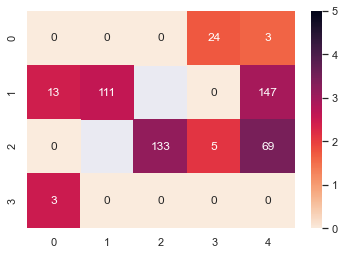

In [24]:
ax = sns.heatmap(brain_qmed_logqt, cmap="rocket_r", vmin=0, vmax=5, annot=brain_go_qt, fmt='g')
plt.savefig('brain-q-contingency.svg')